# Ayudantía 5 - Reactores con Reciclo y Reacciones Múltiples

Dpto. de Ingeniería Química y Bioprocesos

Diseño de Reactores - IIQ2113

Ayudante: Gabriel Miranda Contreras - ggmiranda@uc.cl

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy.optimize as opt

Para abrir en Google Colab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/SysBioengLab/IIQ2113-Chemical-reactor-design/blob/main/Ayudantias/Ayudantia5.ipynb)

# Gráficos pregunta 1.

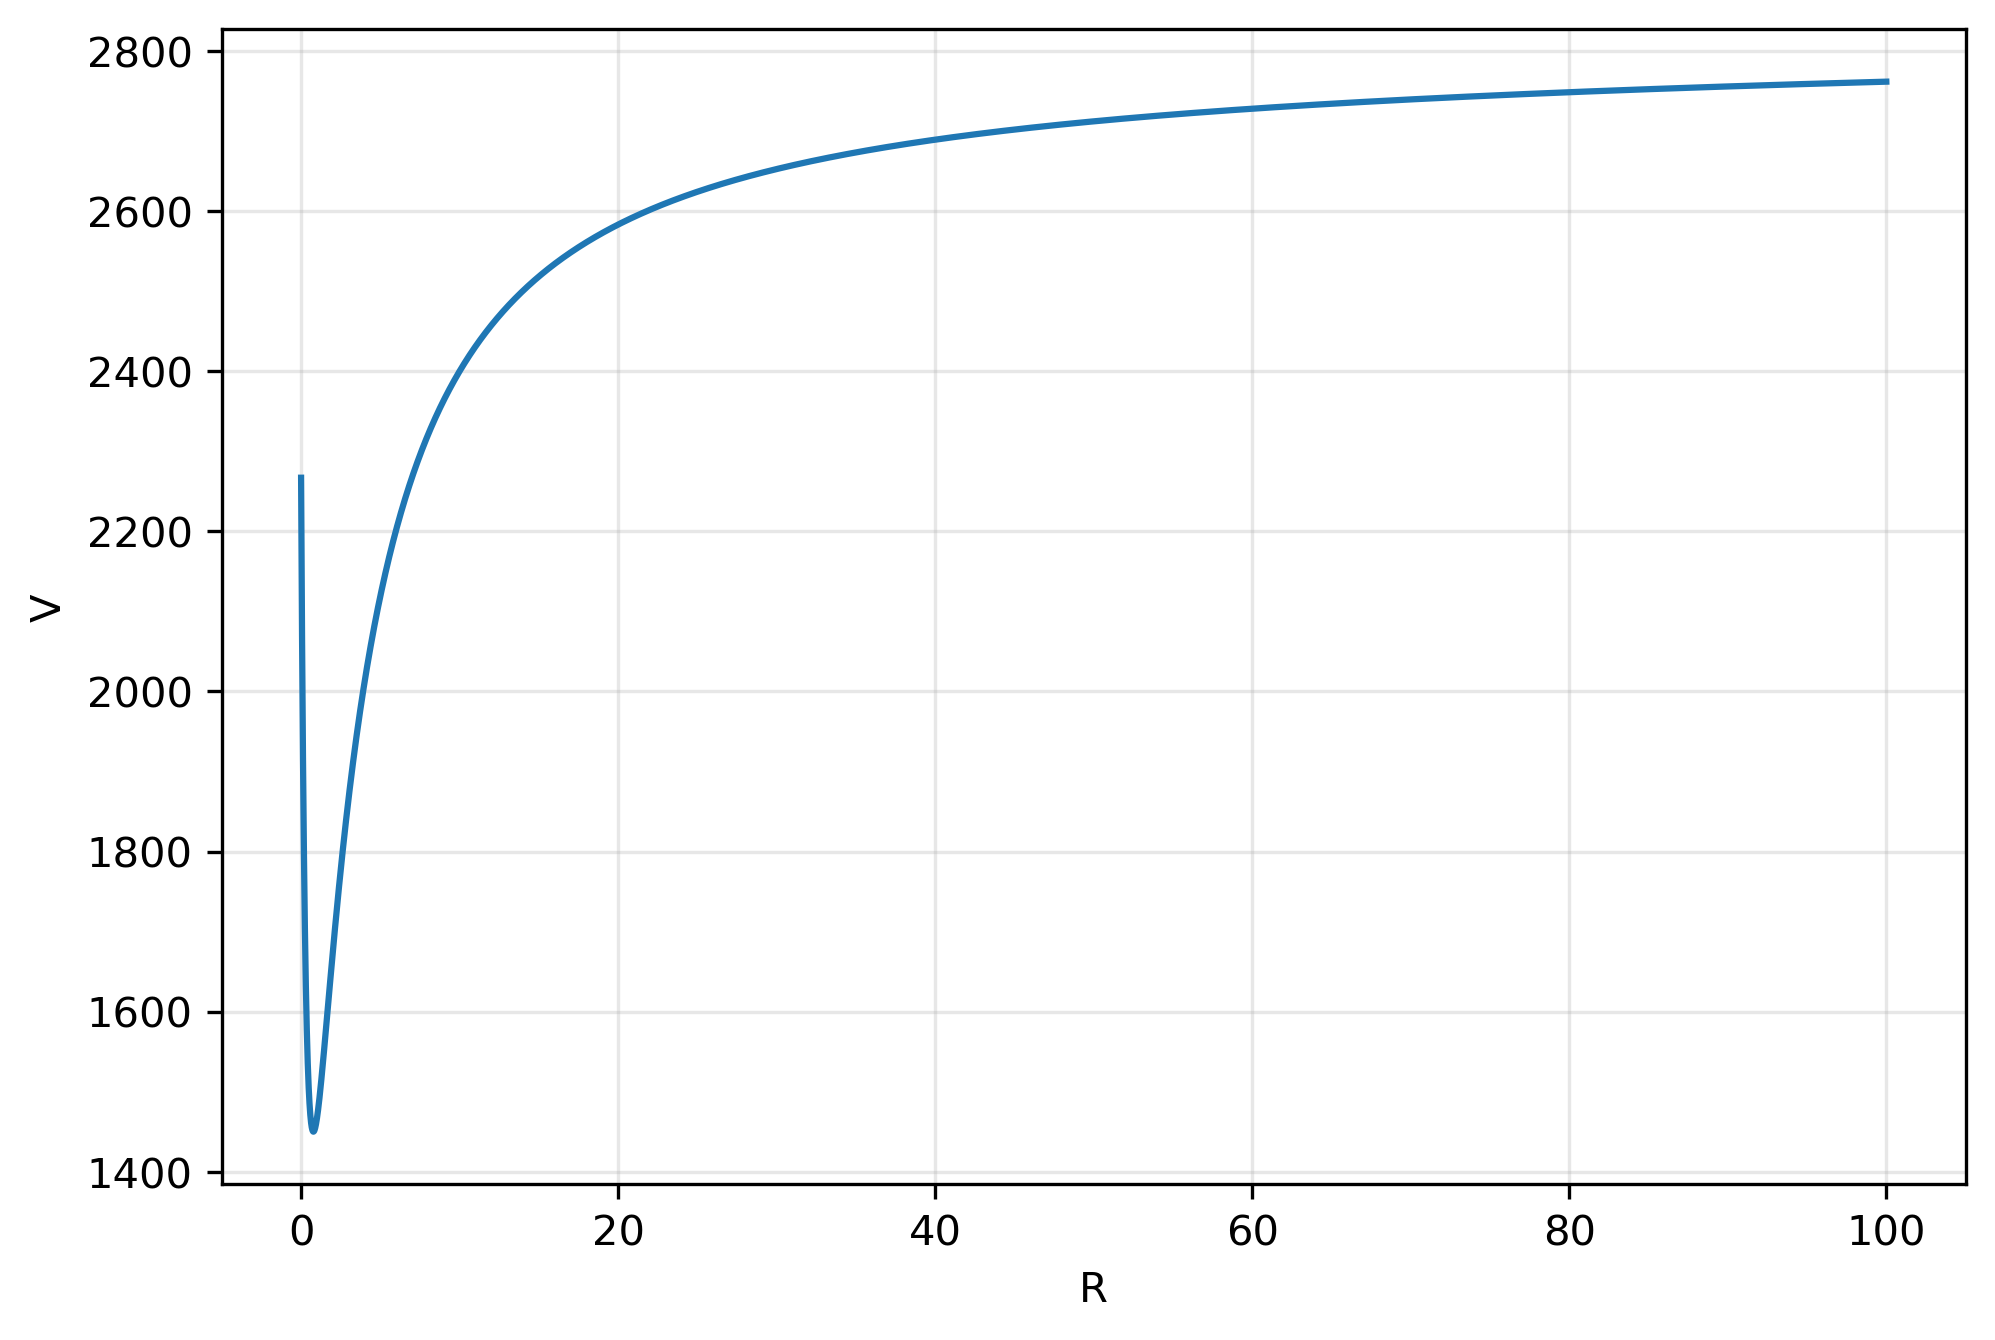

In [2]:
R = np.linspace(0, 100, 10000) # definimos un ramdo arbitrario de R

# definimos el volumen a graficar
V = 250 * (1+R) * (9.067 - 100/3 * (R/(R+1) * 0.8)**3 + 50 * (R/(R+1) * 0.8)**2 - 30 * (R/(R+1) * 0.8))

# plot
plt.figure(figsize=(7.5,5),
        dpi = 300)
plt.plot(R, V, zorder = 3)
plt.xlabel('R')
plt.ylabel('V')

plt.grid(alpha = 0.3, zorder = 0)
plt.show()



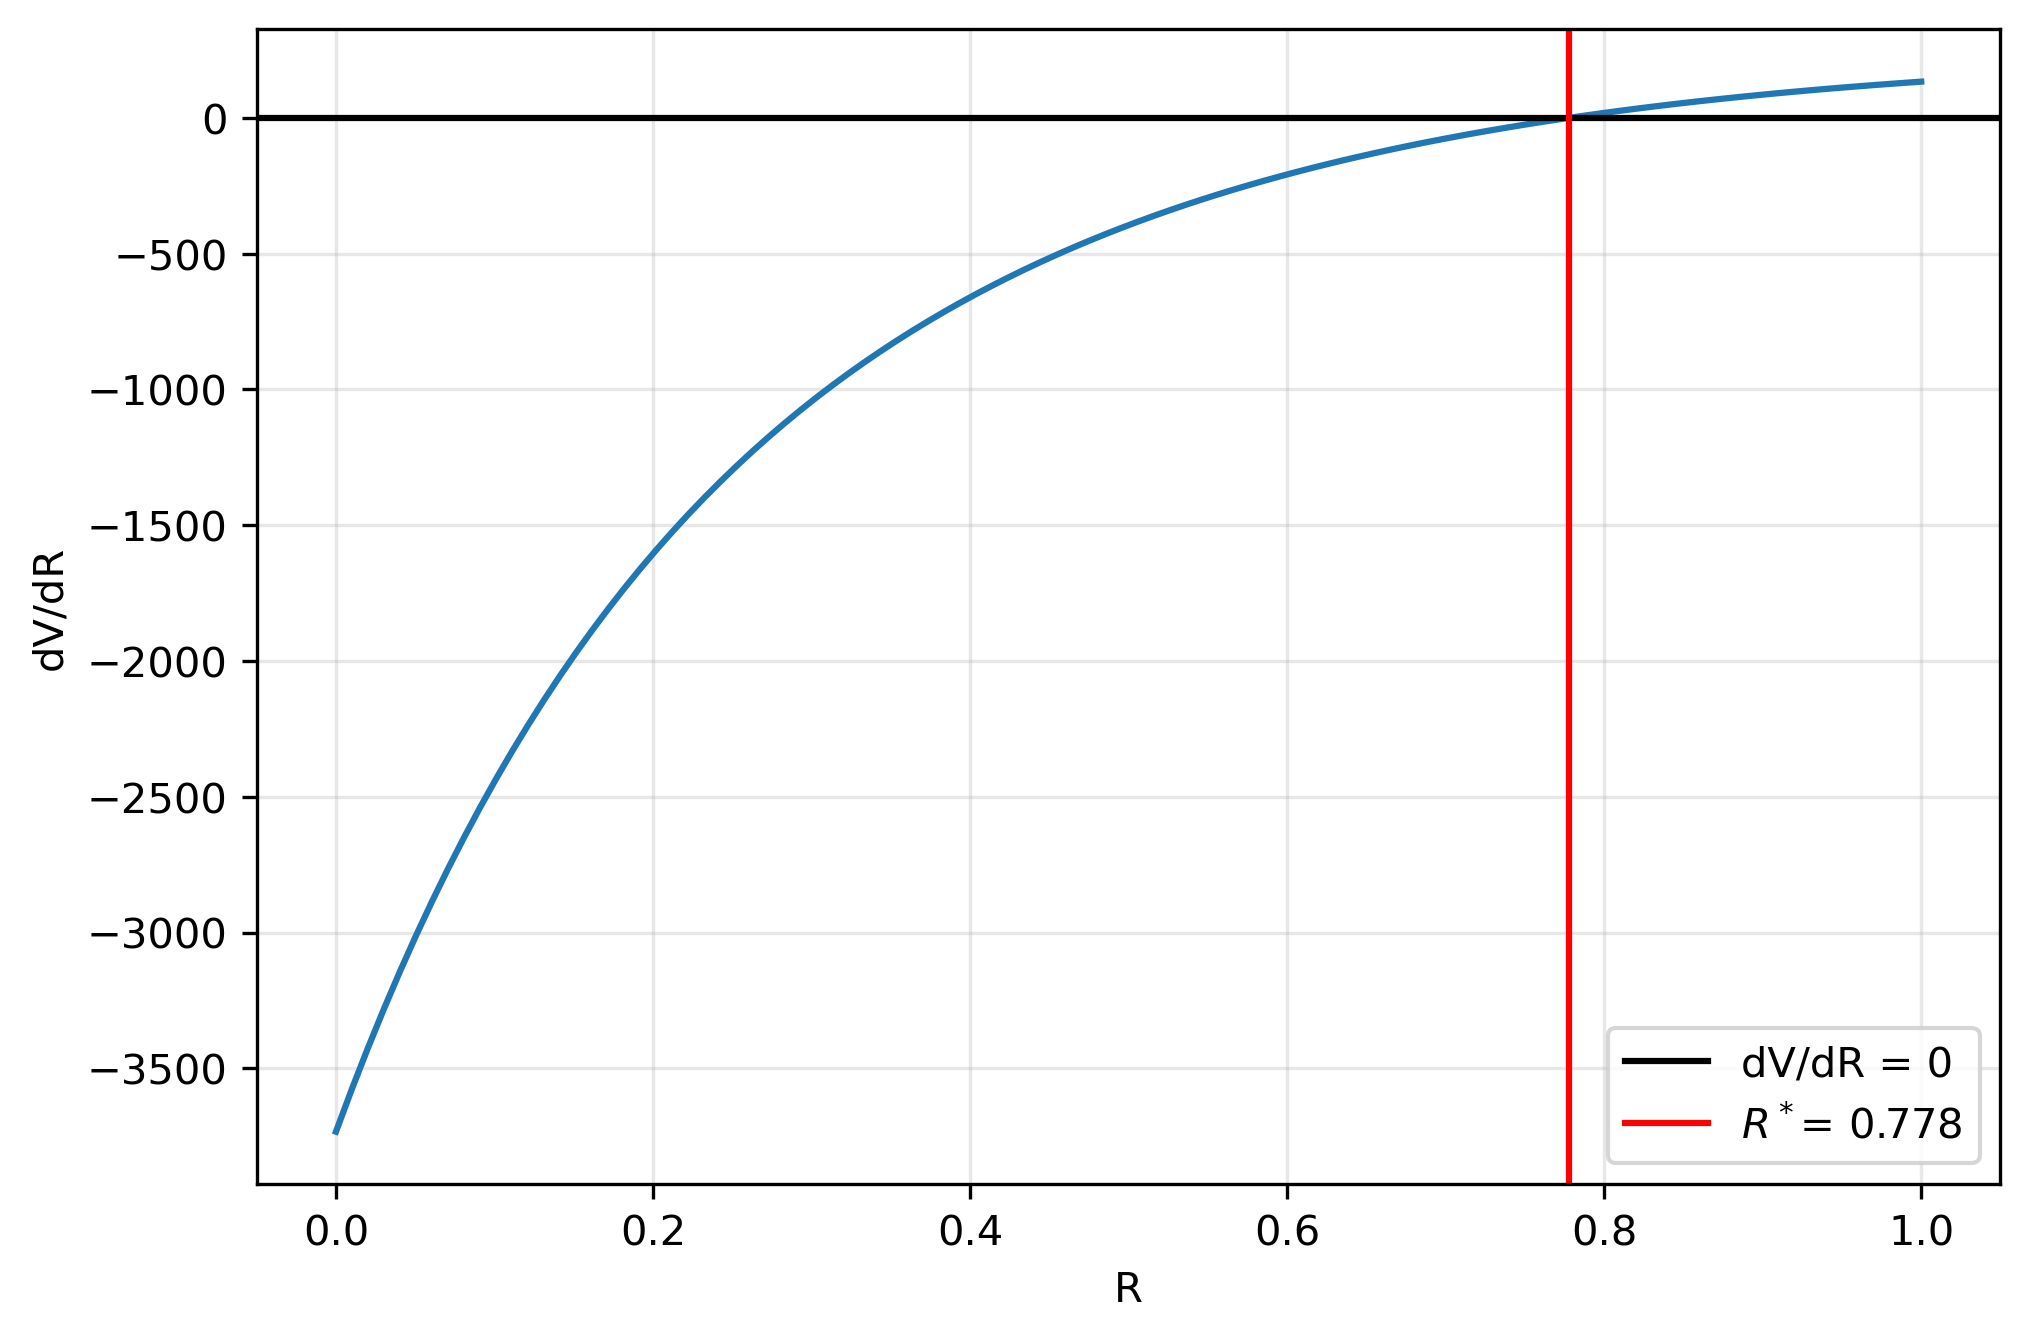

In [ ]:
# graficamos tambien la derivada usamos lambda notation para definir la funcion
dvdr = lambda R: (-3733.25 + 4800.25 * R + 0.25 * R**2 + 0.0833333 * R**3)/(1 + R)**3

R = np.linspace(0,1, 100)
R_star = opt.fsolve(dvdr, 1)
plt.figure(figsize=(7.5,5),
           dpi = 300)
plt.grid(alpha = 0.3, zorder = 0)
plt.plot(R, dvdr(R))
plt.axhline(0, color = 'black', label = 'dV/dR = 0')
plt.axvline(R_star, color = 'red', label = r'$R^*$'+ f'= {R_star[0]:.3f}')
plt.xlabel('R')
plt.ylabel('dV/dR')
plt.legend()


# Pregunta 4.

Consideremos el caso en el que tenemos una cinética
$$
-r_A = \frac{1}{X_A^2 - X_A +0.5}
$$

Comentario:
La notación `neg_ra = lambda x: f(x)` es lo mismos que hacer
```python
def neg_ra(x):   
    return f(x)
```

In [40]:
def cuadrado(x, y):
    return x**2 + y ** 2

cuadrado2 = lambda x, y : x**2 + y**2 
print(cuadrado(8,8))
print(cuadrado2(8,8))

128
128


Text(0, 0.5, '$-\\frac{1}{r_A}$')

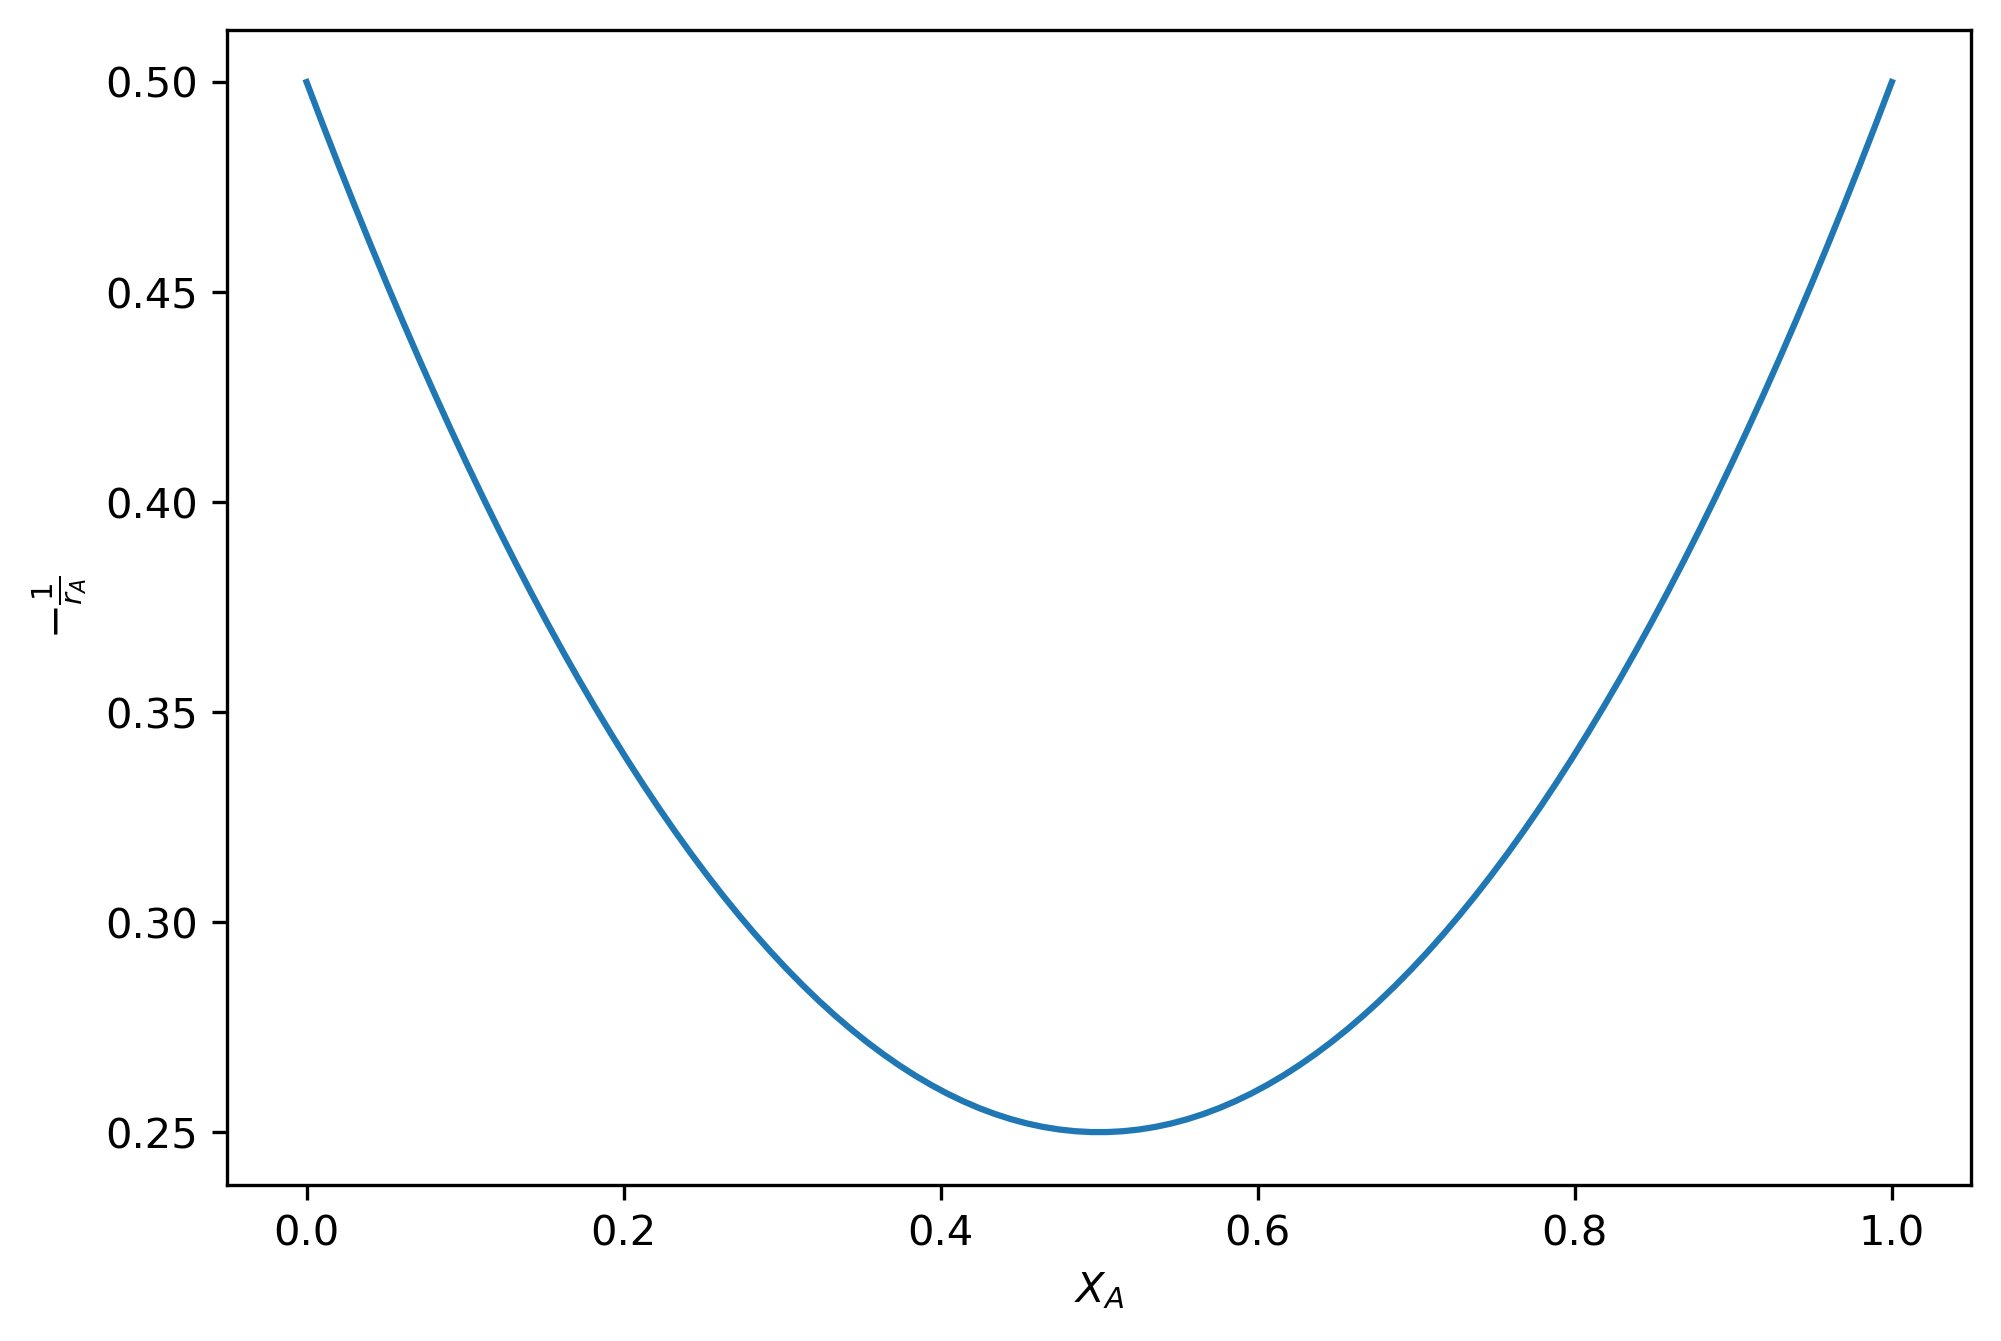

In [3]:
x = np.linspace(0, 1, 100)

neg_ra = lambda x:  (1 / (x**2 - x + 0.5)) # -ra 
plt.figure(figsize=(7.5,5),
           dpi = 300)
plt.plot(x, 1/(neg_ra(x)))
plt.xlabel(r'$X_A$')
plt.ylabel(r'$-\frac{1}{r_A}$')

Para poder definir la igualdad. En este caso, debemos definir una minimización, tal que, dado el problema
$$
          \left[\frac{1}{-r_A}\right]_{X_{Ai}} = \frac{1}{X_{Af} - X_{Ai}} \int_{X_{Ai}}^{X_{Af}} \frac{1}{-r_A}dX_A\; \text{ con } X_{Ai} = \left(\frac{R}{R+1}\right)X_{Af}
$$

Nosotros buscamos

$$
\min_R \left[\left(\left[\frac{1}{-r_A}\right]_{X_{Ai}}\right)  - \left(\frac{1}{X_{Af} - X_{Ai}} \int_{X_{Ai}}^{X_{Af}} \frac{1}{-r_A}dX_A\right) \right]^2
$$

**Comentario:** ¿Porqué estamos utilizando la diferencia cuadrática y no la diferencia unicamente?

Para integrar de forma computacional, se utiliza la función 
```python
quad(f(x), x0, xf)
```
Que va a integrar utilizando el método de los cuadrilateros.

In [4]:
x_Af = 0.8 # dado
def left_right_diff(recy, xaf):
    xi = (recy / (1+recy)) * xaf # definimos xi
    # el lado derecho viene dado por
    left = (1/neg_ra(xi)) 
    
    # el lado izquierdo viene dado por
    right1 = 1/(xaf - xi)
    right2 = quad(lambda x: 1/(neg_ra(x)), xi, xaf)[0]
    right = right1 * right2 
    return np.sqrt((left - right)**2)


res = opt.minimize(left_right_diff, # expresión a minimizar
                   0, # initial guess o supuesto inicial 
                   args=(x_Af,) # argumentos de la función que no son la variable (recy)
                   ) # genera la minimización

R_found = res.x[0]
print(R_found)

0.7777777713520327


Ahora, repitamos el mismo procedimiento, pero utilicemos el procedimiento que viene dado por el enunciado del problema 
> ratio óptimo de reciclo entrega al reactor un una corriente cuyo valor de $\frac{1}{-r_A}$ es equivalente al $\frac{1}{-r_A}$ promedio del reactor

In [5]:
x_Af = 0.8 
def left_right_diff_2(recy, xaf):
    xi = (recy / (1+recy)) * xaf # definimos xi
    # el lado derecho viene dado por
    left = (1/neg_ra(xi)) 
    
    # el lado izquierdo viene dado por
    # generamos los valores de X entre Xi y Xf
    x_range = np.linspace(xi, xaf, 10000)
    # evaluamos neg_ra en cada uno de estos
    eval_neg_ra = 1/neg_ra(x_range)
    # calculamos el promedio
    right = np.mean(eval_neg_ra)
    return np.sqrt((left - right)**2)

res2 = opt.minimize(left_right_diff_2, # expresión a minimizar
                   0, # initial guess o supuesto inicial
                   args=(x_Af,) # argumentos de la función que no son la variable (recy)
                   ) # genera la minimización

R_found_2 = res2.x[0]
print(R_found_2)

0.777733327688417


Ahora grafiquemos para evaluar el procedimiento.

Text(0, 0.5, '$-\\frac{1}{r_A}$')

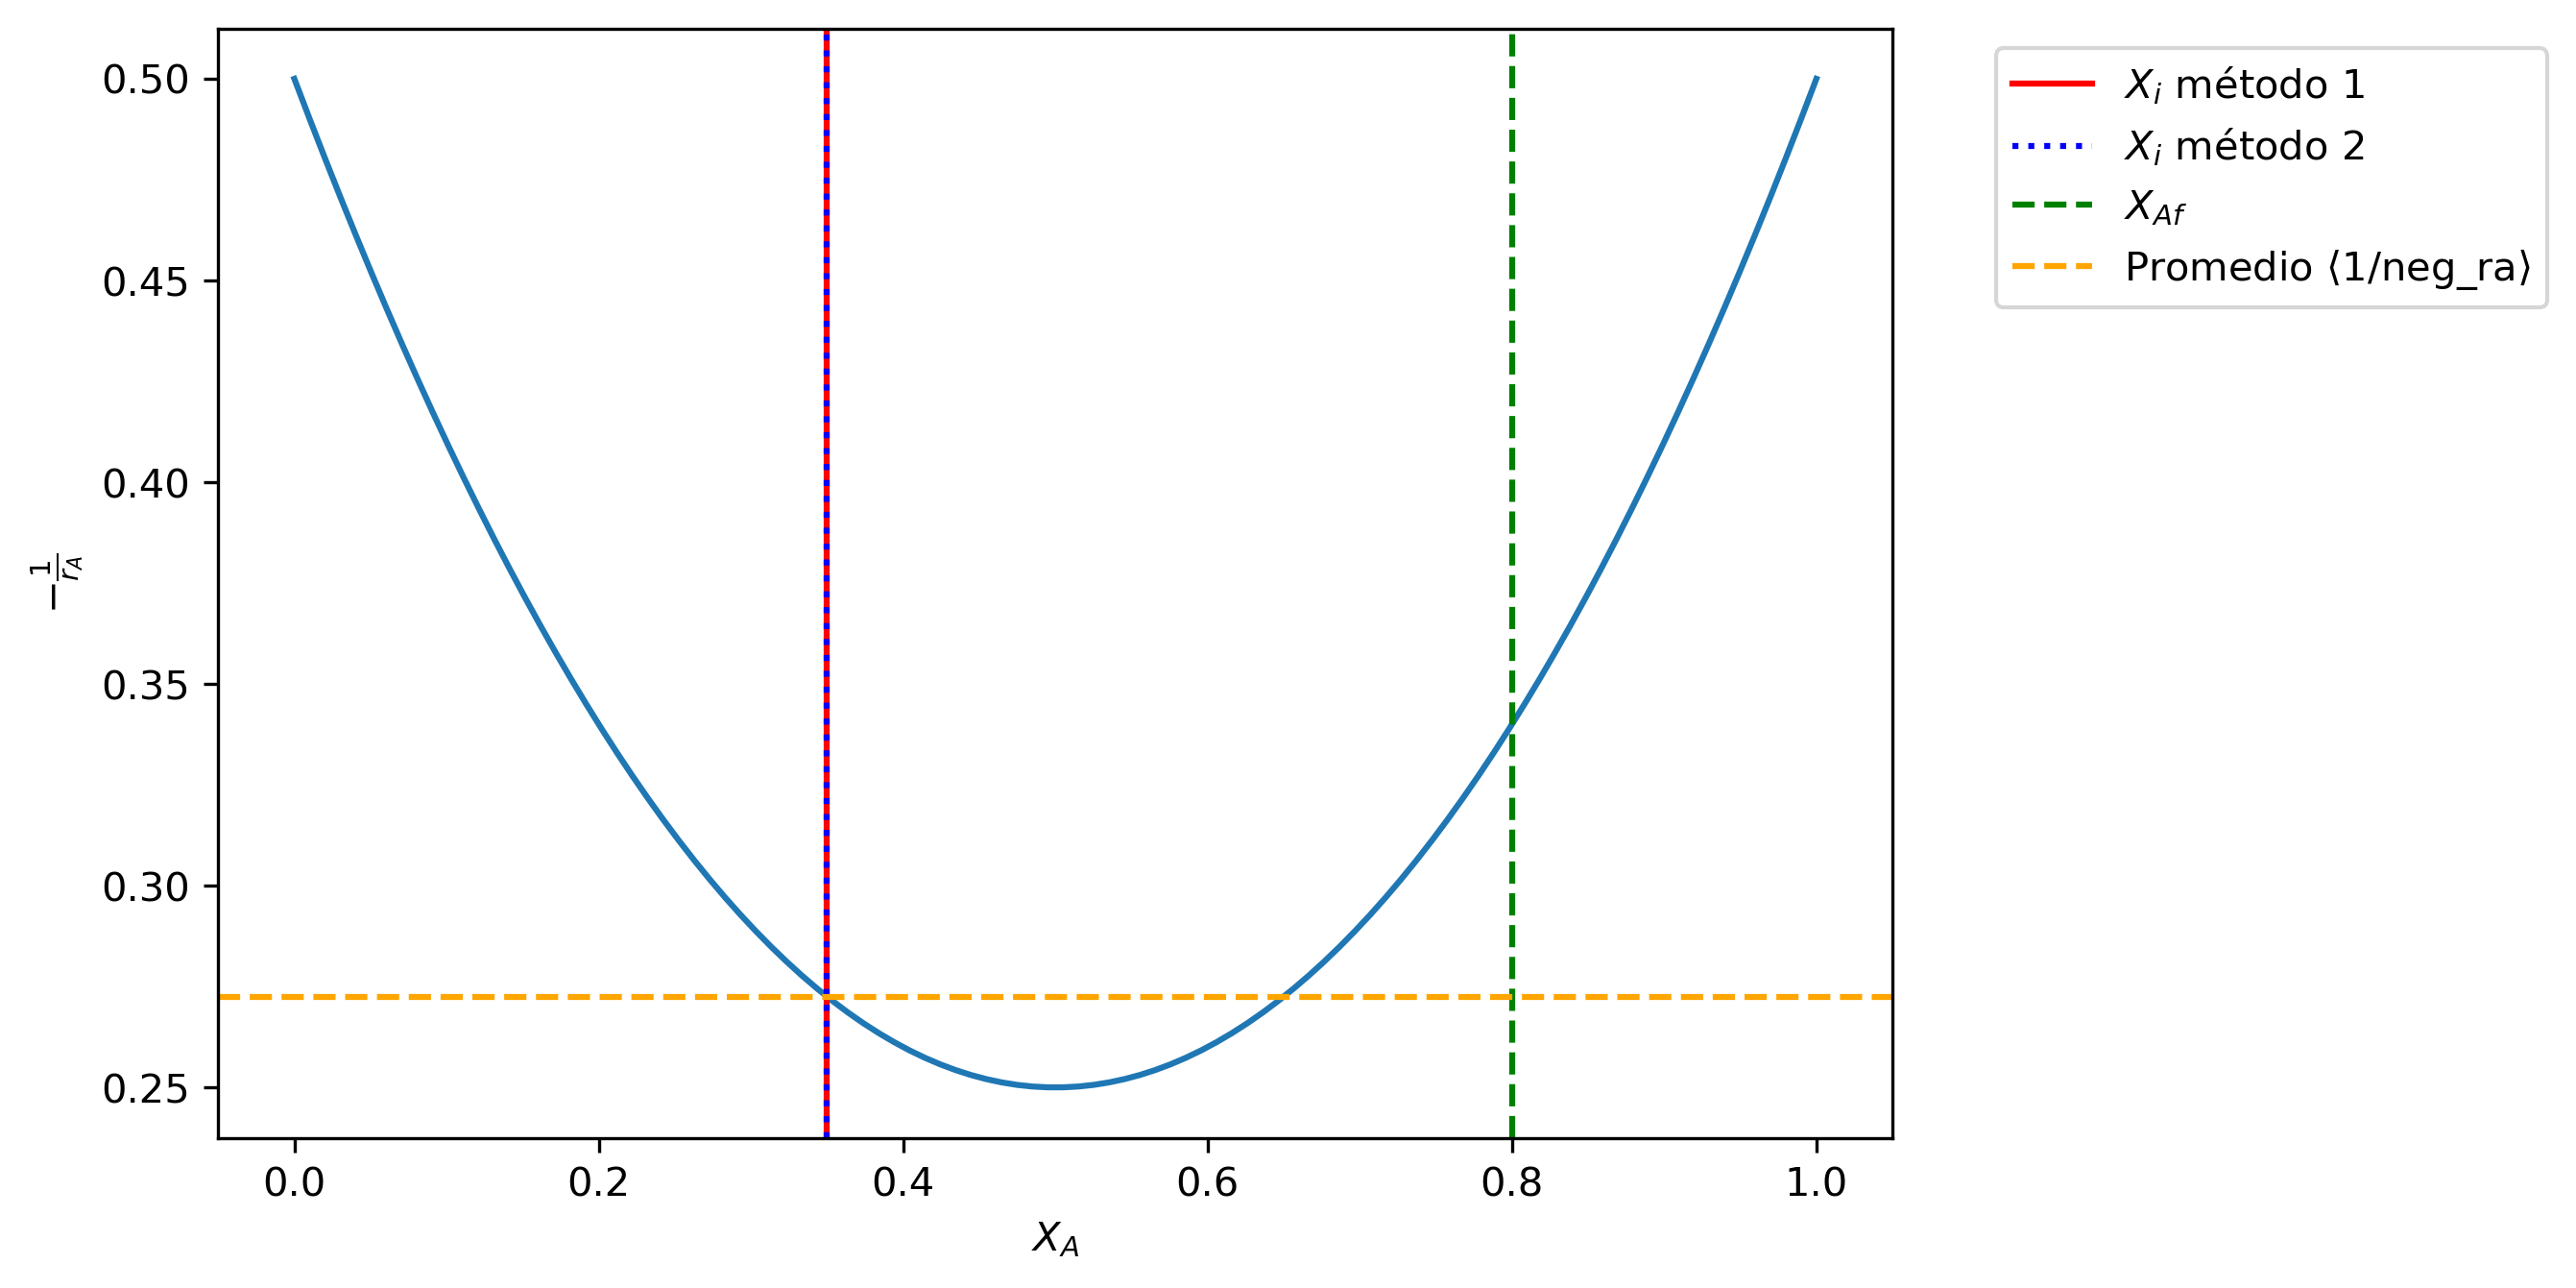

In [6]:
xi = (R_found / (1+R_found)) * x_Af # x_Af = 0.8
xi2 = (R_found_2 / (1+R_found_2)) * x_Af
x_range = np.linspace(0, 1, 100)
neg_ra_eval = 1/neg_ra(np.linspace(xi2, x_Af, 10000))
mean_neg_ra_eval = np.mean(neg_ra_eval)
plt.figure(figsize=(7.5,5),
           dpi = 300)
plt.plot(x_range, (1/neg_ra(x_range)))
plt.axvline(xi, color = 'red', linestyle = '-', label = r'$X_i$ método 1')
plt.axvline(xi2, color = 'blue', linestyle = ':', label = r'$X_i$ método 2')
plt.axvline(x_Af, color = 'green', linestyle = '--', label = r'$X_{Af}$')
plt.axhline(mean_neg_ra_eval, color = 'orange', linestyle = '--', label = r'Promedio $\langle 1/\text{neg\_ra} \rangle$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # hace que este al ladito
plt.xlabel(r'$X_A$')
plt.ylabel(r'$-\frac{1}{r_A}$')

Ahora, intentemoslo con un proceso más cercano a la realidad.
$$
-r_A = k C_A = k C_{A0}(1-X_A)
$$


/var/folders/n8/t936zpy50cn66sdv0cwd2c5r0000gn/T/ipykernel_57255/3140687349.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x, 1/(neg_ra(x)))


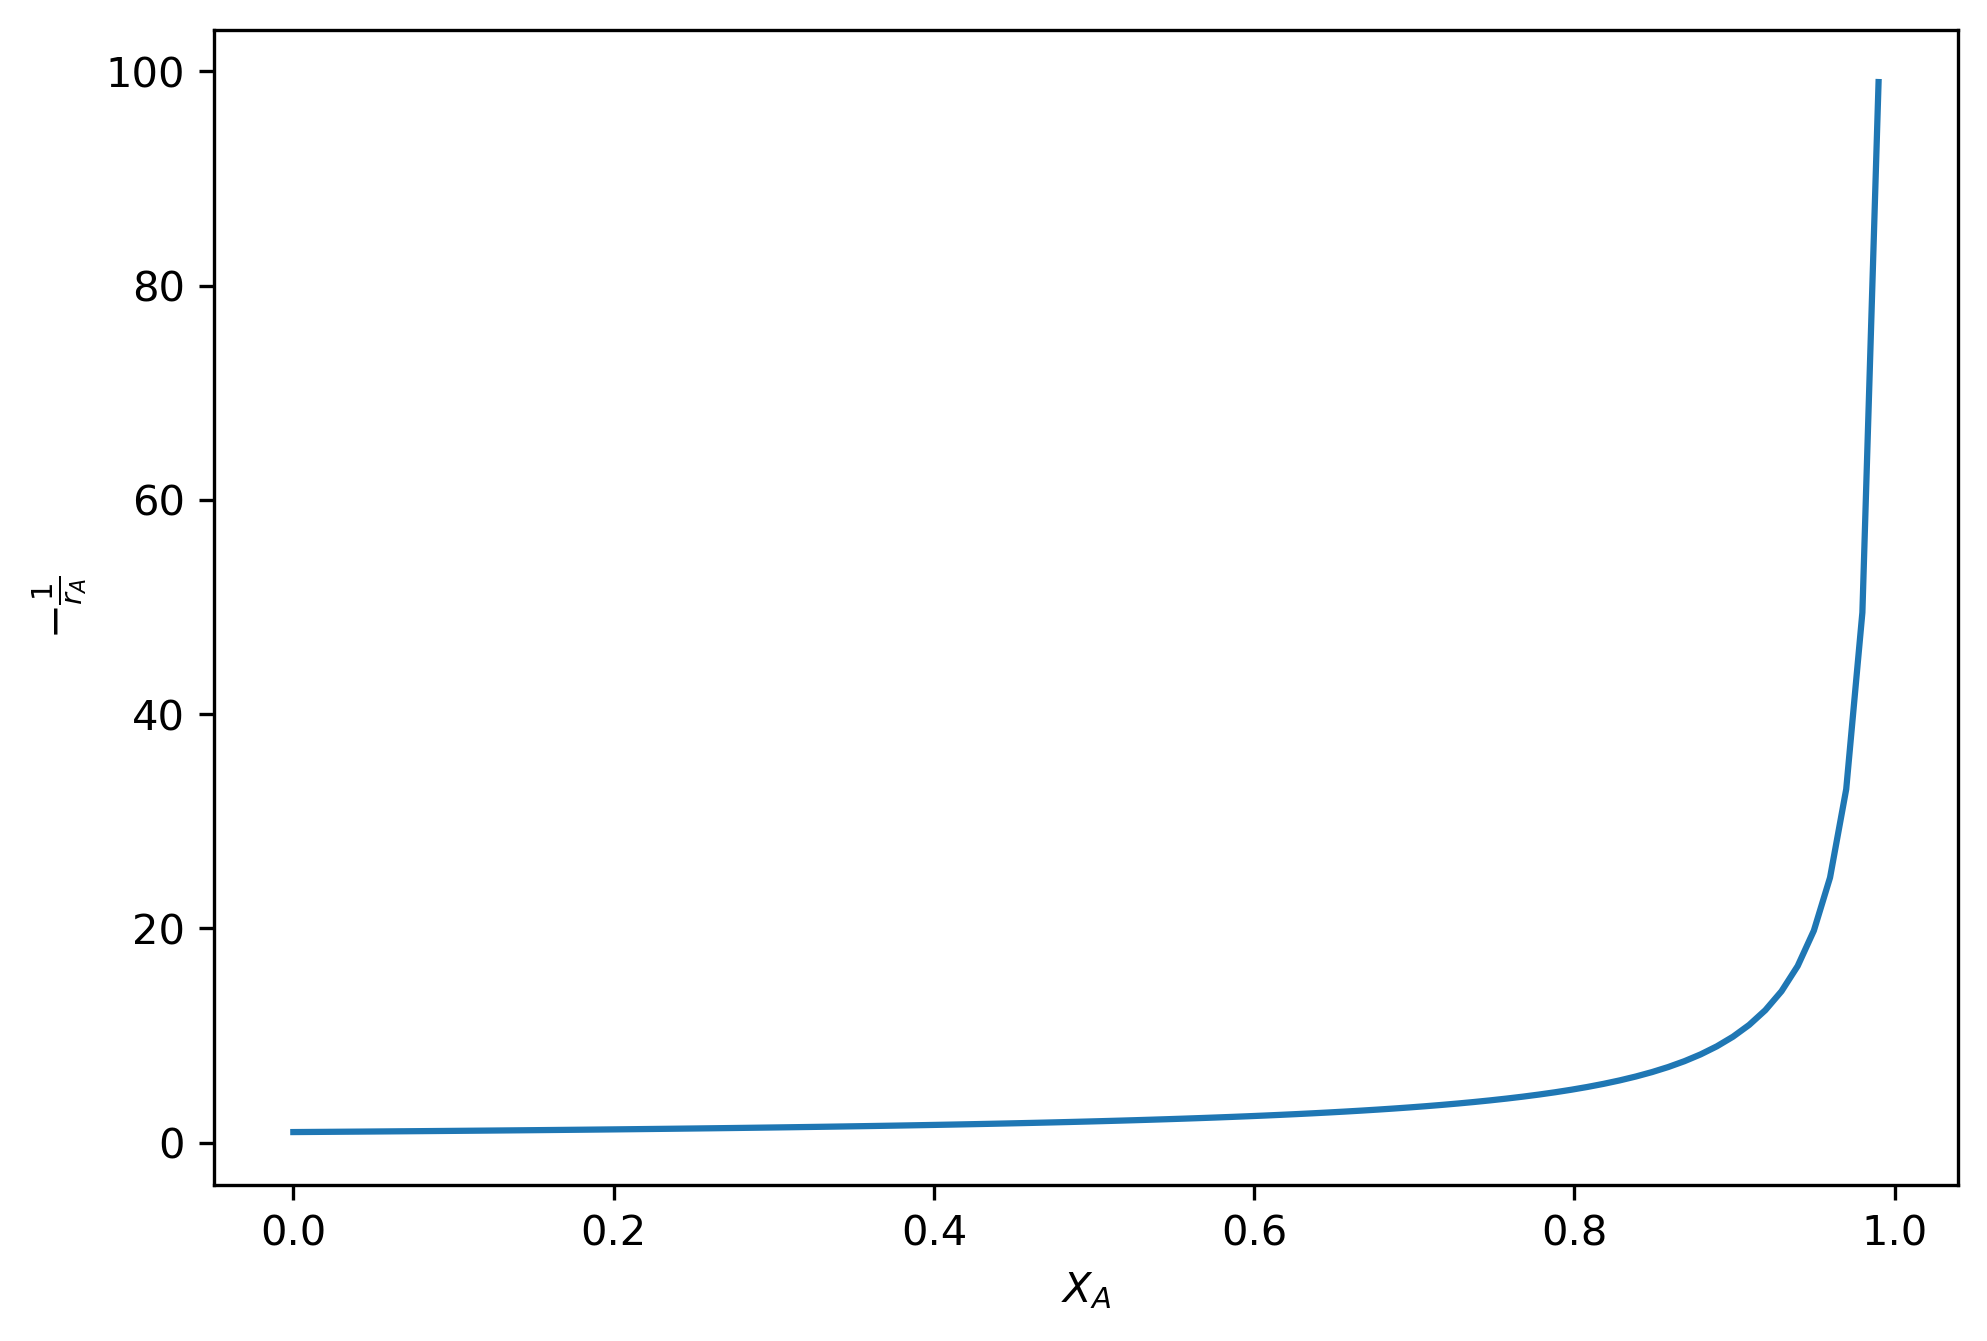

In [7]:
# primero grafiquemos
x = np.linspace(0, 1, 100) 
ca0 = 1
k = 1
neg_ra = lambda x:  (k * (ca0 * (1-x))**1) 
plt.figure(figsize=(7.5,5),
           dpi = 300)
plt.plot(x, 1/(neg_ra(x)))
plt.xlabel(r'$X_A$')
plt.ylabel(r'$-\frac{1}{r_A}$')
plt.show()


Repitamos el mismo procedimiento.

In [ ]:

x_Af = 0.8 # dado

# lo mismo de antes
def left_right_diff(recy, x_Af):
    xi = (recy / (1+recy)) * x_Af
    left = (1/neg_ra(xi))
    right1 = 1/(x_Af - xi)
    right2 = quad(lambda x: 1/(neg_ra(x)), xi, x_Af)[0]
    right = right1 * right2
    return ((left - right)**2)
    
res = opt.minimize(left_right_diff, 0, args=(x_Af,),
                bounds=[(0, None)],
                method = 'L-BFGS-B') # probar con L-BFGS-B y TNC

R_found = res.x[0]
print(R_found)

def left_right_diff_2(recy, xaf):
    xi = (recy / (1+recy)) * xaf # definimos xi
    # el lado derecho viene dado por
    left = (1/neg_ra(xi)) 
    
    # el lado izquierdo viene dado por
    # generamos los valores de X entre Xi y Xf
    x_range = np.linspace(xi, xaf, int(1e4))
    # evaluamos neg_ra en cada uno de estos
    eval_neg_ra = 1/neg_ra(x_range)
    # calculamos el promedio
    right = np.mean(eval_neg_ra)
    return ((left - right)**2)


res_2 = opt.minimize(left_right_diff_2, 0, args=(x_Af,),
                     bounds=[(0, None)],
                     method = 'L-BFGS-B') # probar con L-BFGS-B y TNC

R_found_2 = res_2.x[0]
print(R_found_2)

0.0
0.0


/var/folders/n8/t936zpy50cn66sdv0cwd2c5r0000gn/T/ipykernel_57255/1018106995.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x_range, (1/neg_ra(x_range)))


Text(0, 0.5, '$-\\frac{1}{r_A}$')

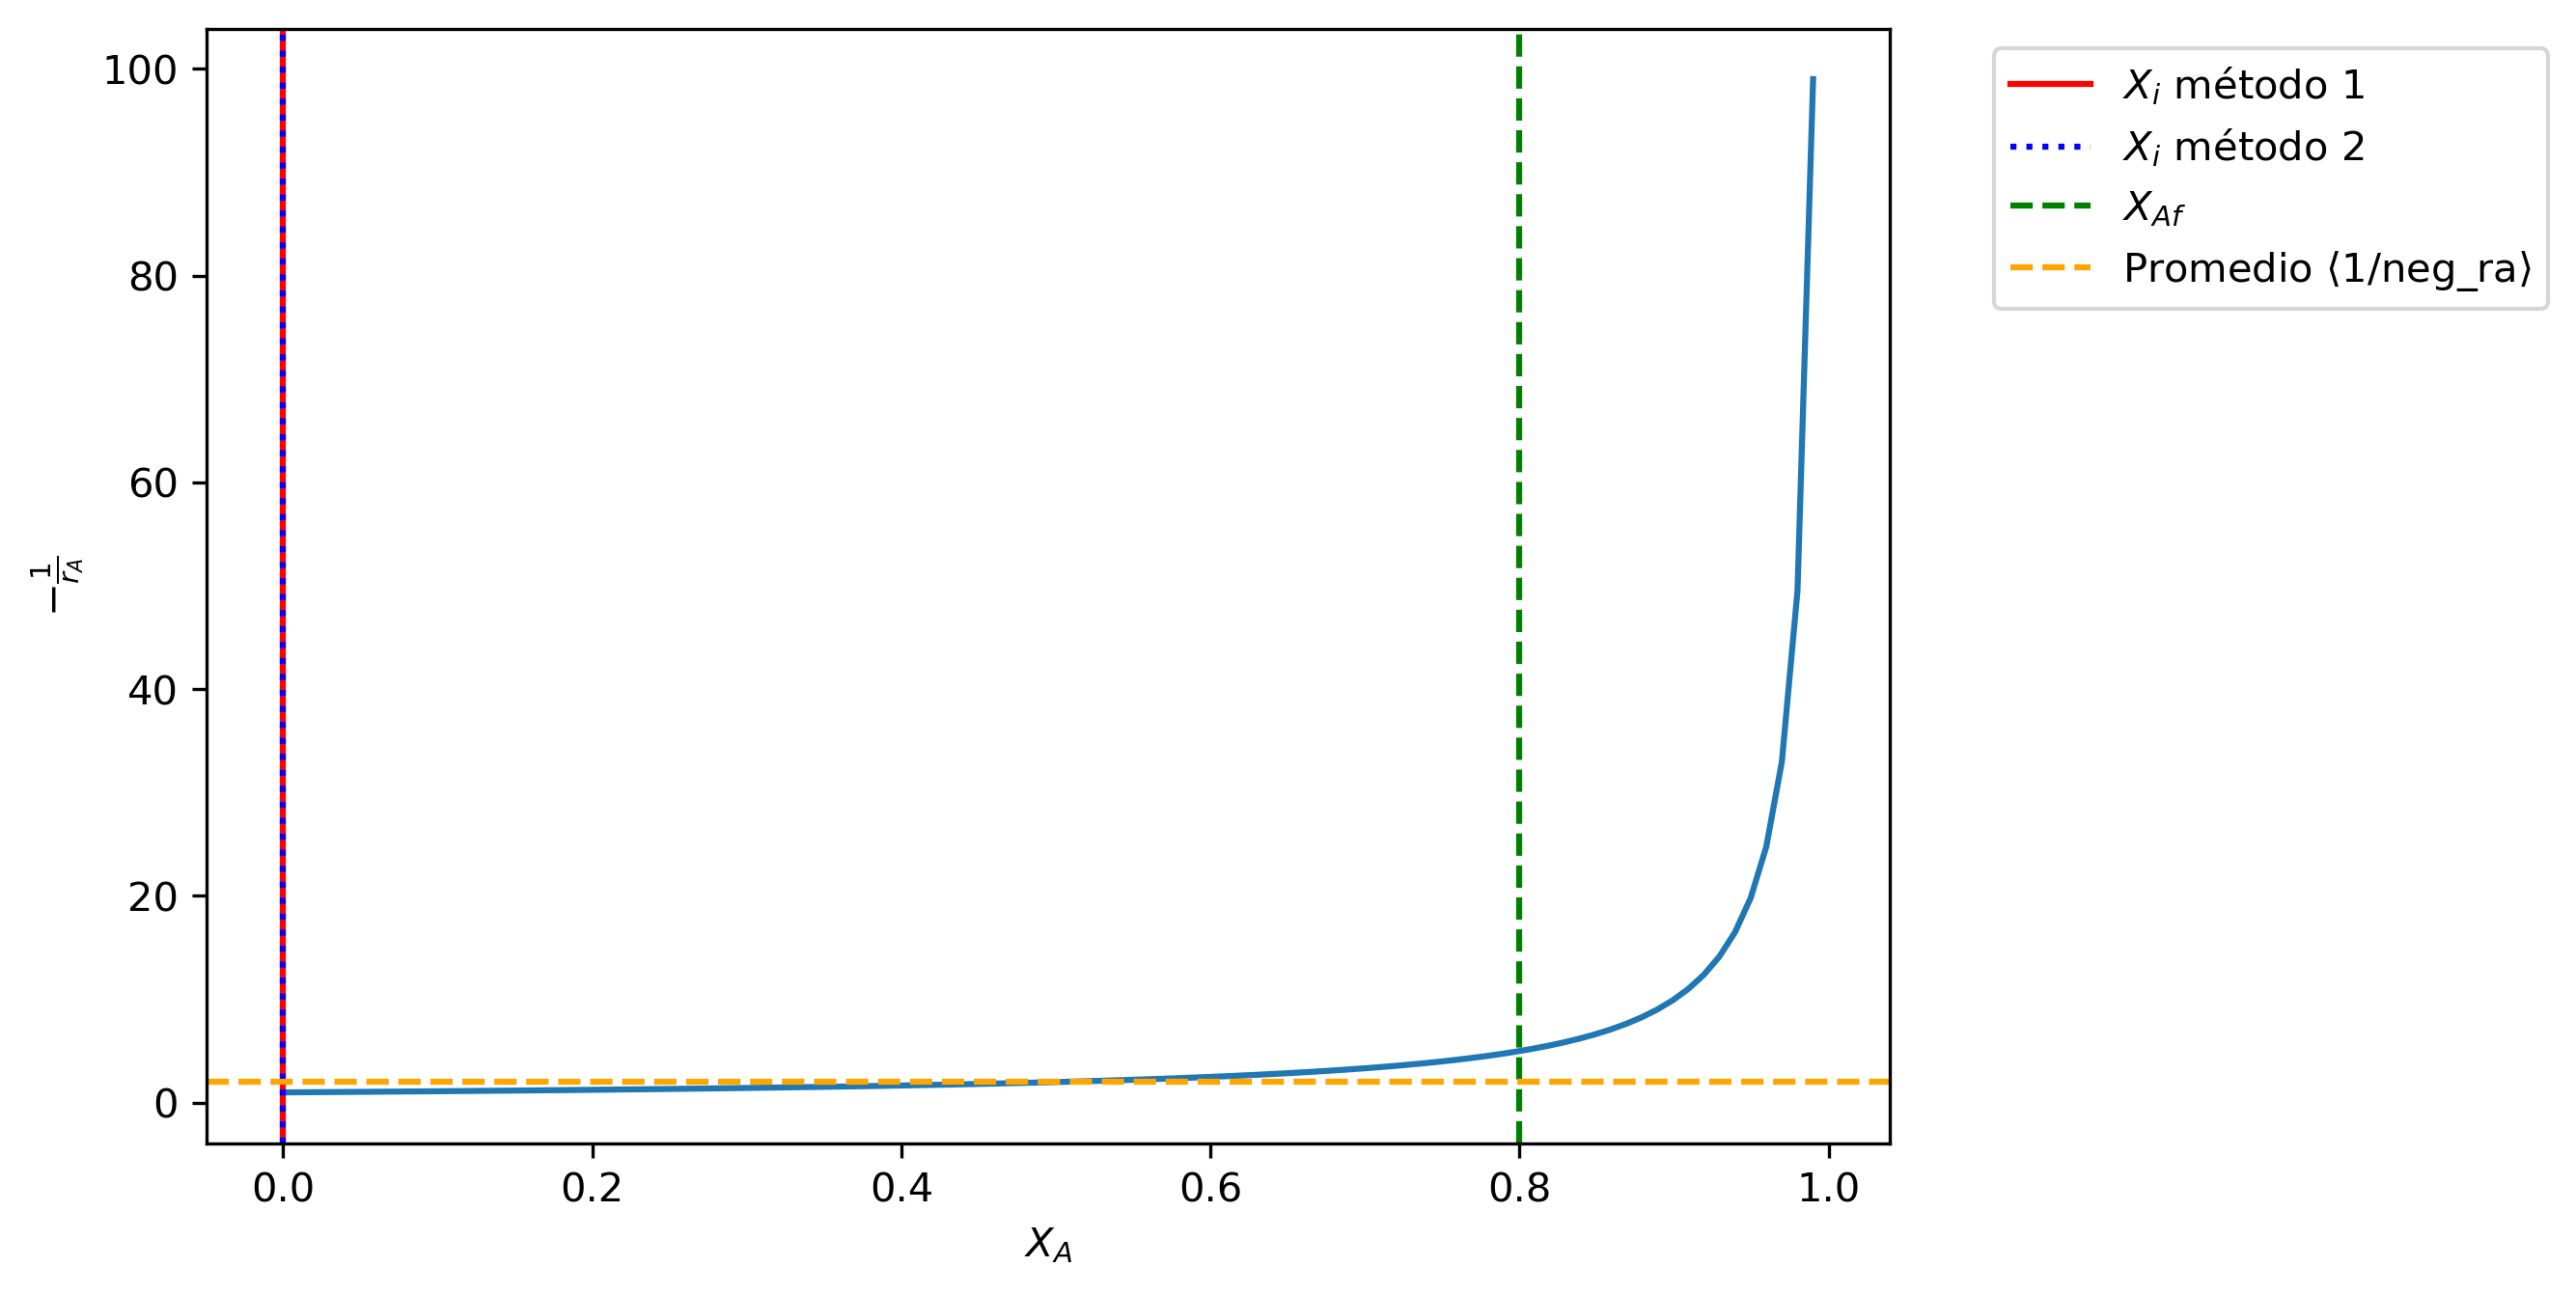

In [37]:
xi = (R_found / (1+R_found)) * x_Af # x_Af = 0.8
xi2 = (R_found_2 / (1+R_found_2)) * x_Af
x_range = np.linspace(0, 1, 100)
neg_ra_eval = 1/neg_ra(np.linspace(xi2, x_Af, 10000))
mean_neg_ra_eval = np.mean(neg_ra_eval)
plt.figure(figsize=(7.5,5),
           dpi = 300)
plt.plot(x_range, (1/neg_ra(x_range)))
plt.axvline(xi, color = 'red', linestyle = '-', label = r'$X_i$ método 1')
plt.axvline(xi2, color = 'blue', linestyle = ':', label = r'$X_i$ método 2')
plt.axvline(x_Af, color = 'green', linestyle = '--', label = r'$X_{Af}$')
plt.axhline(mean_neg_ra_eval, color = 'orange', linestyle = '--', label = r'Promedio $\langle 1/\text{neg\_ra} \rangle$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # hace que este al ladito
plt.xlabel(r'$X_A$')
plt.ylabel(r'$-\frac{1}{r_A}$')